In [77]:
import numpy as np
import networkx as nx
from scipy.optimize import minimize
import matplotlib.pyplot as plt


In [87]:
#total budget B for the total number of chargers
#B=2
#B=14
f=open("input.txt","r")
B=int(f.readline())
#No. of nodes=4
#nodes=4
#nodes=22
V=int(f.readline())
#total no. of poi
#pi=2
pi=int(f.readline())
#poi nodes
#v=[0,1]
#v=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]
v=[]
line=f.readline()
for i in line.split():
    v.append(int(i))
#candidate location nodes
#W=[2,3]
#W=[15,16,17,18,19,20,21]
W=[]
line=f.readline()
for i in line.split():
    W.append(int(i))
#total no. of candidate location
#m=2
m=int(f.readline())
#d stands for local charging demand
#d=[2,3]
#d=[1,10,6,20,11,5,15]
d=[]
line=f.readline()
for i in line.split():
    d.append(int(i))
#n stands for no. of chargers
#n=[0,0]
n=[]
line=f.readline()
for i in line.split():
    n.append(int(i))
chargers=[]
line=f.readline()
for i in line.split():
    chargers.append(int(i))
#r stands for radius of the candidate station
r=int(f.readline())
#u is the rate of local charging demand satisfied by one charger
u=int(f.readline())
#alpha is an adjustable parameter
alpha=float(f.readline())
#nb is the no of chargers deployed
nb=int(f.readline())
#dist[i][j] is the distance between two nodes
#dist=[[0,4,8,9],
 #  [4,0,7,3],
  # [8,7,0,6],
   #[9,3,6,0]]
dist=[]
ar=[]
l=f.readlines()
for line in l:
    for i in line.split():
        ar.append(int(i))
    dist.append(ar)
    ar=[]

f.close()

In [79]:
######################## basic functions ############################

def print_pretty(arr):
    print(" ")
    for i in range(nodes):
        for j in range(nodes):
            print(arr[i][j], end="\t")
        print("")
    return 

    

In [80]:
#fn. for reward for POI coverage


def reward_poi(W,d,r,n):
    global m
    global v
    global dist
    PS=[]
    for i in range(0,m):
        if(n[i]>=1):
            j=W[i]
            for k in v:
                if (dist[j][k]<=r):
                    if k not in PS:
                        PS.append(k)
    return len(PS)
    
reward_poi(W,d,r,n)

0

In [81]:

#fn. for reward for local charging demand
def reward_lcd(W,d,r,n):
    global m
    global u
    Rd=0
    for j in range(0,m):
        rd=0
        if (d[j]<u*n[j]):
            rd=d[j]
        else:
            rd=u*n[j]
        Rd=Rd+rd
    return Rd
 
    
    
reward_lcd(W,d,r,n)

0

In [82]:
#fn. for increased reward 
def increased_reward(W,d,r,n):
    global m
    maxm=0
    j=0
    global alpha
    for i in range(0,m):
        n_plus=[]
        n_plus=n_plus+n
        rew_org_poi=reward_poi(W,d,r,n)
        rew_org_lcd=reward_lcd(W,d,r,n)
        n_plus[i]=n[i]+1
        rew_new_poi=reward_poi(W,d,r,n_plus)
        rew_new_lcd=reward_lcd(W,d,r,n_plus)
        inc_reward_poi=rew_new_poi-rew_org_poi
        inc_reward_lcd=rew_new_lcd-rew_org_lcd
        inc_rew=((alpha*inc_reward_poi)+((1-alpha)*inc_reward_lcd))
        if(inc_rew>maxm): 
            maxm=inc_rew
            j=i
    return j
    

        
increased_reward(W,d,r,n)

0

In [83]:
def increased_reward_for_j(W,d,r,n,j):
        global alpha
        n_plus=[]
        n_plus=n_plus+n
        rew_org_poi=reward_poi(W,d,r,n)
        rew_org_lcd=reward_lcd(W,d,r,n)
        n_plus[j]=n[j]+1
        rew_new_poi=reward_poi(W,d,r,n_plus)
        rew_new_lcd=reward_lcd(W,d,r,n_plus)
        inc_reward_poi=rew_new_poi-rew_org_poi
        inc_reward_lcd=rew_new_lcd-rew_org_lcd
        inc_rew=alpha*inc_reward_poi+(1-alpha)*inc_reward_lcd
        return inc_rew
    
j=increased_reward(W,d,r,n)
increased_reward_for_j(W,d,r,n,j)

9.5

In [84]:
def charger_based_greedy():
    global W
    global d
    global r
    global n
    global nb
    global B
    while(nb<B):
        j=increased_reward(W,d,r,n)
        if increased_reward_for_j(W,d,r,n,j)==0:
            break
        n[j]=n[j]+1
        nb=nb+1
    return(n)


charger_based_greedy() 

[3, 1, 2, 1, 2, 2, 0, 1, 0, 2, 1, 1, 3, 1, 2, 0, 0]

In [85]:
global chargers
print("No. of chargers in each charging station before applying greedy algorithm:")
print(chargers)
print("No. of chargers in each charging station after applying greedy algorithm:")
print(charger_based_greedy())

No. of chargers in each charging station before applying greedy algorithm:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
No. of chargers in each charging station after applying greedy algorithm:
[3, 1, 2, 1, 2, 2, 0, 1, 0, 2, 1, 1, 3, 1, 2, 0, 0]


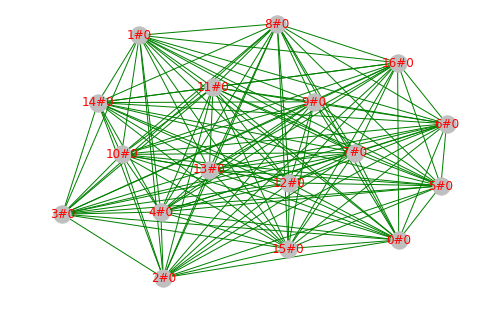

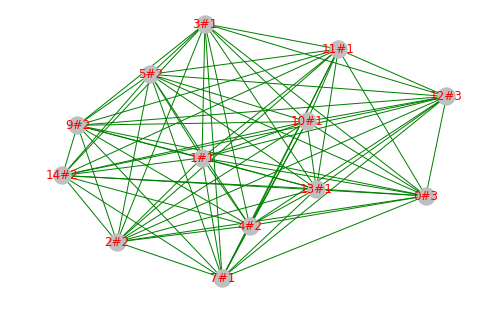

In [86]:
G = nx.Graph()
for i in W:
    for j in W:
         G.add_edge(i, j, weight=dist[i][j])
            
            
temp=W[0]              
net_labels1={}
j=0
for i in W:
    net_labels1[i] = str(i-temp) + "#" + str(chargers[j])
    j=j+1   
            
nx.draw(G,with_labels=True, weight=dist, labels = net_labels1, font_color = "red", node_color='0.75', edge_color = "green")
plt.savefig("candidate-location_before.png", dpi=250)
plt.show()

            
for i in range(0,m):
    if n[i]==0:
        G.remove_node(W[i])
w=[]
c=[]
for i in range(0,m):
    if n[i]!=0:
        w.append(W[i])
        c.append(n[i])
        
net_labels2={} 
j=0
for i in w:
    net_labels2[i] = str(i-temp) + "#" + str(c[j])
    j=j+1

nx.draw(G,with_labels=True, weight=dist,labels = net_labels2,font_color = "red", node_color='0.75', edge_color = "green")
plt.savefig("candidate-location_after.png", dpi=250)
plt.show()